# __UFC Fighter Performance Analysis__

### __Introduction__
In this study, we explore the performances of mixed martial arts (MMA) fighters as captured in the 'ufc_data' dataset. (_data source: https://www.kaggle.com/datasets/danmcinerney/mma-differentials-and-elo/code_) This dataset compiles detailed match statistics for various fighters, including their most recent fight dates. The data spans several years and includes metrics such as punches thrown, punches landed, takedowns attempted, and takedowns succeeded, among others. These performance indicators provide a rich basis for analyzing trends, predicting future fight outcomes, and understanding the factors that contribute to a fighter's success in the ring.

### __Motivation__

My motivation for delving into this analysis stems from a profound passion for combat sports and a recognition of the analytical gap within this field. Despite the popularity and strategic depth of mixed martial arts (MMA), there remains a stark lack of targeted, data-driven research aimed at enhancing fighter performance through strategic planning and tailored training regimes. This study addresses this gap by providing a meticulous analysis of fighters' strengths and weaknesses, offering actionable insights that are seldom found in the sports industry.

The insights gleaned from this research are not just academic; they have practical implications that could revolutionize how fighters prepare for bouts. By understanding specific performance metrics and opponent tendencies, fighters and coaches can devise more effective training strategies, enhancing their chances of victory. This not only elevates the competitive standards within the sport but also contributes to the safety and career longevity of the athletes by enabling smarter, more informed decision-making in their preparation processes. For enthusiasts, practitioners, and strategists within the realm of combat sports, this research offers a novel perspective that merges the thrill of the sport with the precision of analytics, making it an indispensable tool in the evolving landscape of MMA.

### __Contribution__
The most novel aspect of this study lies in the integration of clustering techniques and multilayer perceptron (MLP) regression into the analysis of mixed martial arts (MMA) fighters' performances. While traditional statistical analyses provide valuable insights, they often fall short in capturing complex, non-linear relationships and patterns within data. By employing clustering algorithm and MLP regressor models, this research segments fighters into distinct groups based on similar traits and performance metrics, offering a nuanced understanding that goes beyond conventional categorizations. This approach allows for the identification of unique fighting styles and strategies that correlate with success in the ring, which have not been systematically grouped and analyzed in previous studies.

### __Methodology__

_Only the attack/strike metrics of the fighters are taken into account for the performance analysis. Whereas, in the MLP regression all the figter metrics (attack,defence,wrestling, grapling) are included in the model and the three attack metrics Leg_strikes_landed, Body_strikes_landed, Head_strikes_landed have been predicted_

 __Descriptive Statistics:__ This foundational technique involves summarizing the dataset to understand    the distribution, central tendencies, and variability of the data. It provides a clear initial picture of the data characteristics and helps identify the structure of the data and so helps in identifying any outliers that may influence further analysis.

 __Clustering Techniques:__ clustering analysis has been implemented to segment fighters into distinct groups based on performance metrics. This unsupervised learning technique helps identify intrinsic groupings within the data that may not be apparent through standard categorization, providing deeper insights into fighter strategies and effectiveness.

 __MLP (Multilayer Perceptron) Regression:__ This advanced machine learning approach uses a type of artificial neural network for predictive modeling. By training the MLP model on both raw and derived features, Three strike metrics have been predicted with a high degree of complexity and nuance. This method is particularly valuable for capturing the nonlinear relationships often present in sports performance data.


 ### __Main Result__

#### Strategy for Kamaru Usaman vs Max Holloway fight:

_Let's assume that Kamaru Usaman is our client who wants to understand the strength and weakness of his opponent Max Holloway. According 
to our skill comparison plot,  Max Holloway is an aggresive fighter, meaning he is going throw more punches and kicks. Kamaru Usman
should be able to defend well and wait for his opponent to tire himself out. Kamaru has a better Leg strike capability and leg gameplay
Therefore he should capitalize on it. In all other aspects both the fighters are almost similar_

#### Also, according to our model: Kamaru should have the following stats to in order to win the fight.

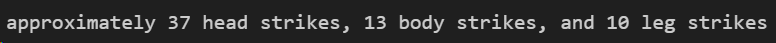

### __Conclusion__

In this study, I have undertaken a comprehensive analysis of the attack attributes of UFC fighters, comparing various metrics such as punches and kicks between each fighters. By employing advanced statistical methods and machine learning techniques, including regression models, I have predicted the approximate number of punches and kicks a fighter must attempt in a fight in order to win against a particular opponent. This predictive modeling enables us to construct detailed attack profiles for each fighter, enhancing our understanding of their combat strategies and tendencies.

The analysis does not stop here. The methodologies and insights gained from examining offensive behaviors pave the way for a more holistic evaluation of a fighter's capabilities. The next phase of this research will extend to a complete analysis of the defensive, wrestling, and grappling profiles of UFC fighters. By integrating these aspects, we aim to develop a full-spectrum profile for each fighter, which could significantly impact training strategies, match preparations, and in-fight tactics. This extended analysis will further our ability to predict fight outcomes and refine fighter training programs, potentially setting new standards in competitive martial arts analytics.


In [54]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import nbformat
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from modules.mlp.mlp import MLP
import pickle
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt

In [55]:
ufc_data = pd.read_csv("data/ufc_data.csv")
ufc_data = ufc_data.iloc[:, 1:] 
ufc_data.head()

date                                          fight_url  \
0  2016-01-02  http://ufcstats.com/fight-details/d5778494ce66...   
1  2016-01-02  http://ufcstats.com/fight-details/d5778494ce66...   
2  2016-01-02  http://ufcstats.com/fight-details/b46b27222e62...   
3  2016-01-02  http://ufcstats.com/fight-details/b46b27222e62...   
4  2016-01-02  http://ufcstats.com/fight-details/4fa02674b920...   

                                           event_url  result  title_fight  \
0  http://ufcstats.com/event-details/380e8b023290...       0            0   
1  http://ufcstats.com/event-details/380e8b023290...       1            0   
2  http://ufcstats.com/event-details/380e8b023290...       0            0   
3  http://ufcstats.com/event-details/380e8b023290...       1            0   
4  http://ufcstats.com/event-details/380e8b023290...       0            0   

            fighter          opponent    stance         dob      division  \
0      edgar garcia  sheldon westcott  Orthodox  1984-02-22  Welterweight   
1  sheldon westcott      edgar garcia  Southpaw  1984-08-20  Welterweight   
2          joe soto  michinori tanaka  Orthodox  1987-03-22  Bantamweight   
3  michinori tanaka          joe soto  Orthodox  1990-10-04  Bantamweight   
4         joe duffy    dustin poirier  Orthodox  1988-02-18   Lightweight   

   ... distance_strikes_def_differential  clinch_strikes_def_differential  \
0  ...                          1.500000                             1.00   
1  ...                          0.666667                             1.00   
2  ...                          1.983790                             1.00   
3  ...                          0.504086                             1.00   
4  ...                          0.837438                             1.04   

  ground_strikes_def_differential sub_attempts_per_min_differential  \
0                        1.805009                          1.000000   
1                        0.554014                          1.000000   
2                       28.571429                          0.102696   
3                        0.000000                          0.000000   
4                       32.500000                          0.050336   

  sub_landed_per_min_differential takedowns_landed_per_min_differential  \
0                             1.0                              0.000000   
1                             1.0                              0.035864   
2                             1.0                              0.385109   
3                             1.0                              2.596667   
4                             1.0                              0.000000   

  takedowns_attempts_per_min_differential  \
0                                0.000000   
1                                0.035864   
2                                0.577664   
3                                1.731111   
4                                0.000000   

   sig_strikes_landed_per_min_differential  \
0                                 0.032645   
1                                30.632995   
2                                 1.439092   
3                                 0.694883   
4                                 3.208357   

   sig_strikes_attempts_per_min_differential  \
0                                   0.040909   
1                                  24.444511   
2                                   0.674954   
3                                   1.481582   
4                                   4.557145   

   total_strikes_landed_per_min_differential  
0                                   0.017954  
1                                  55.696354  
2                                   1.665031  
3                                   0.600590  
4                                   4.256788  

[5 rows x 200 columns]

#### Age vs Performance Analysis

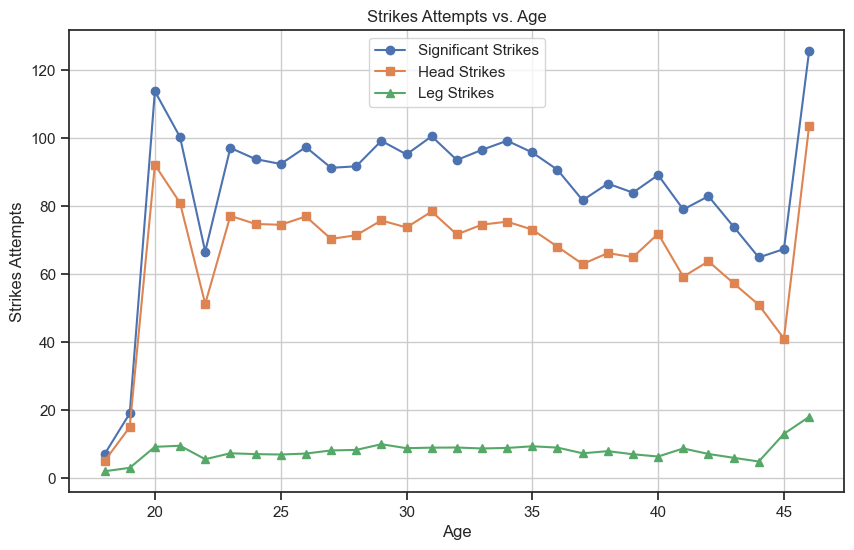

In [56]:
age_analysis = ufc_data.copy()
age_analysis['date'] = pd.to_datetime(age_analysis['date'])
age_analysis['dob'] = pd.to_datetime(age_analysis['dob'])
age_analysis['age'] = age_analysis['date'].dt.year - age_analysis['dob'].dt.year
avg_sig_strikes_by_age = age_analysis.groupby('age')['sig_strikes_attempts'].mean()
avg_head_strikes_by_age = age_analysis.groupby('age')['head_strikes_attempts'].mean()
avg_leg_strikes_by_age = age_analysis.groupby('age')['leg_strikes_attempts'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_sig_strikes_by_age, label='Significant Strikes', marker='o')
plt.plot(avg_head_strikes_by_age, label='Head Strikes', marker='s')
plt.plot(avg_leg_strikes_by_age, label='Leg Strikes', marker='^')
plt.title('Strikes Attempts vs. Age')
plt.xlabel('Age')
plt.ylabel('Strikes Attempts')
plt.legend()
plt.grid(True)
plt.show()

_In the above plot, we can see a downeard trend from the age of 30 indicating that Age has some impact on fighter performance. As the fighter grows old his endurnace and stamina reduces thereby affecting his fighting capability. Also, the fighter is prone to  injuries and there is a possibility that the past injuries might also affect fighter performance with time. We can also infer that as the fighters grow old they might change their tactic/startegy resulting in lesser strike attempts (The spike in attempts at 46 is because of a single fighter, a potential outlier)_

#### Splitting the dataset

_Since we want to concentrate on just the attack metrics of a fighter, we are splitting the dataset based on
the skill columns. (Standup data, Defense data, Wrestling data, Grapling and Stamina data)_

In [57]:
standup_mask = ufc_data.iloc[:, [0,3,5,6,7,9,10,17,20] + list(range(28, 40))]
wrestling_mask = ufc_data.iloc[:, [0,3,5,6,26,27,42,43]]
grappling_mask = ufc_data.iloc[:, [0,3,5,6,22,23,24,25]]
stamina_mask = ufc_data[['date', 'result', 'fighter','opponent','round','num_fights','comp_time']]
defense_mask = ufc_data.iloc[:, [0,3,5,6] + list(range(62, 72))]
standup_mask.columns
standup_mask = standup_mask.iloc[:, [2,4,8,9,10,13,14,15,16,17,18,19,20]]
wrestling_mask.columns
wrestling_mask = wrestling_mask.iloc[:, [2,4,5,6,7]]
grappling_mask.columns
grappling_mask = grappling_mask.iloc[:, [2,4,5,6,7]]

#### Aggregating the data

_By looking at the structure of the data, we can see that the each fighter has data in multiple rows. In order to not include duplicates in our analysis we shall aggregate the data appropriatley._

In [59]:
attack_data = standup_mask.groupby([standup_mask.columns[0], standup_mask.columns[1]]).sum()
wrestling_data = wrestling_mask.groupby([standup_mask.columns[0]]).sum()
grapling_data = grappling_mask.groupby([standup_mask.columns[0]]).sum()
result = defense_mask.groupby('fighter')['date'].max()
result = pd.DataFrame(result)
result.reset_index(inplace=True)
result['concat'] = result['fighter'] + ' ' + result['date']
defense_mask['concat'] = defense_mask['fighter'] + ' ' + defense_mask['date']
defense_data  = pd.merge(result, defense_mask, on='concat', how='inner')
defense_data.columns
defense_data = defense_data.iloc[:, [0] + list(range(7, 16))]

C:\Users\nihil\AppData\Local\Temp\ipykernel_28260\3136142644.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Feature Engineering

_We are introducing new accuracy columns into our attack dataset. This is basically done by dividing the number of movements landed by number of movements attempted. Also, any potential infinities or Nan values are also removed so that it doesn't affect our results._

In [60]:
attack_data['sig_strike_accuracy'] = attack_data['sig_strikes_landed'] / attack_data['sig_strikes_attempts']
attack_data['head_strike_accuracy'] = attack_data['head_strikes_landed'] / attack_data['head_strikes_attempts']
attack_data['body_strike_accuracy'] = attack_data['body_strikes_landed'] / attack_data['body_strikes_attempts']
attack_data['leg_strike_accuracy'] = attack_data['leg_strikes_landed'] / attack_data['leg_strikes_attempts']
attack_data['distance_strike_accuracy'] = attack_data['distance_strikes_landed'] / attack_data['distance_strikes_attempts']
attack_data.replace([float('inf'), -float('inf'), pd.NA], np.nan, inplace=True)
attack_data.fillna(0, inplace=True)

_We also want to analyse only those fighters who have participated in more than 10 fights as this will give a much better understanding of the fighters skills and talents. taking into account the results and performances of a new fighter might skew the analysis._

In [61]:
fighter_counts = ufc_data.groupby('fighter').size()
fighter_counts_df = fighter_counts.reset_index(name='fight_count')
attack_data = attack_data.merge(fighter_counts_df, on='fighter', how='left')
filtered_attack_data = attack_data[attack_data['fight_count'] > 10].copy()

#### Applying K-Means Clustering based on Fighter Strike Accuracy

In [62]:
# Clustering with k=3 as we want to classify the fighters into 3 groups
features = ['sig_strike_accuracy', 'head_strike_accuracy', 'body_strike_accuracy', 'leg_strike_accuracy', 'distance_strike_accuracy']

kmeans = KMeans(n_clusters=3, random_state=42)
filtered_attack_data['cluster'] = kmeans.fit_predict(filtered_attack_data[features])
centroids = kmeans.cluster_centers_
cluster_profiles = pd.DataFrame(centroids, columns=features)
filtered_attack_data['Fighter_strike_performance'] = filtered_attack_data['cluster'].apply(lambda x: 'Good' if x == 1 else ('Average' if x == 2 else 'Below Average'))
cluster_profiles = cluster_profiles.reset_index()
cluster_profiles.rename(columns={'index': 'cluster_group'}, inplace=True)

In [63]:
cluster_means = cluster_profiles.groupby('cluster_group').mean().reset_index()
fig = px.bar(cluster_means, x='cluster_group', y=cluster_means.columns[1:], barmode='group', title="Accuracy Metrics of each Cluster")
fig.update_layout(
    xaxis_title='Cluster Group',
    yaxis_title='Average Accuracy',
    legend_title='Accuracy Metrics'
)
fig.show()

_The above Interactive plots shows the accuracy performace of each group as classified by the K-Means algorithm. Group 1 has the best metrics followed by Group 2 and Group 0._

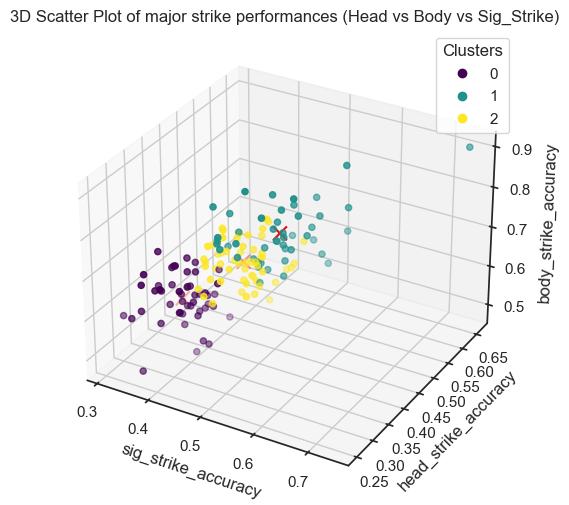

In [64]:
fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_attack_data[features[0]], filtered_attack_data[features[1]], filtered_attack_data[features[2]], c=filtered_attack_data['cluster'], cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=100, marker='x')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.title('3D Scatter Plot of major strike performances (Head vs Body vs Sig_Strike)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

_The above 3-D plots shows the results of the clustering algorithm, Fighters in cluster 0 might be less accurate overall but better at body strikes, possibly due to their fighting style or technique emphasis._

_We also want to to know the gamestyle of each fighter i.e. is he an aggressive fighter or not? which part of the body does he target? We have tried to answer all this below_ 

In [66]:
attempt_cols = [col for col in filtered_attack_data.columns if 'attempts' in col]
filtered_attack_data['total_attempts'] = filtered_attack_data[attempt_cols].sum(axis=1)
average_total_attempts = filtered_attack_data['total_attempts'].mean()
filtered_attack_data['Aggressive_gameplay'] = (filtered_attack_data['total_attempts'] / average_total_attempts)*100
filtered_attack_data['lower_body_attempts'] = filtered_attack_data['body_strikes_attempts'] + filtered_attack_data['leg_strikes_attempts']
filtered_attack_data['leg_strike_gameplay'] = (filtered_attack_data['lower_body_attempts']/filtered_attack_data['head_strikes_attempts'])*100
radar_plot_data = filtered_attack_data[['fighter', 'leg_strike_gameplay', 'Aggressive_gameplay','head_strike_accuracy','leg_strike_accuracy','sig_strike_accuracy']].copy()
radar_plot_data['head_strike_accuracy'] = radar_plot_data['head_strike_accuracy'].multiply(100)
radar_plot_data['leg_strike_accuracy'] = radar_plot_data['leg_strike_accuracy'].multiply(100)
radar_plot_data['sig_strike_accuracy'] = radar_plot_data['sig_strike_accuracy'].multiply(100)
normalized_df = (radar_plot_data.drop('fighter', axis=1)- radar_plot_data.drop('fighter', axis=1).min()) / (radar_plot_data.drop('fighter', axis=1).max() - radar_plot_data.drop('fighter', axis=1).min()) * 100
radar_plot_data.reset_index(drop=True, inplace=True)
filtered_attack_data.reset_index(drop=True, inplace=True)
radar_plot_data['fighter'] = filtered_attack_data['fighter']

In [67]:
normalized_df = normalized_df.rename(columns={'leg_strike_gameplay': 'leg_gameplay', 'Aggressive_gameplay': 'Aggressive_gameplay','head_strike_accuracy': 'head_strike_skill'
                                                  ,'leg_strike_accuracy': 'leg_strike_skill','sig_strike_accuracy': 'sig_strike_skill'})

#### Plotting a Radar Plot to compare fighter Skills 

d:\Studies_Data_Science\SEM_2\Data_management\Project\modules\fighter_profile\fighter_skill_comparison.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

d:\Studies_Data_Science\SEM_2\Data_management\Project\modules\fighter_profile\fighter_skill_comparison.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



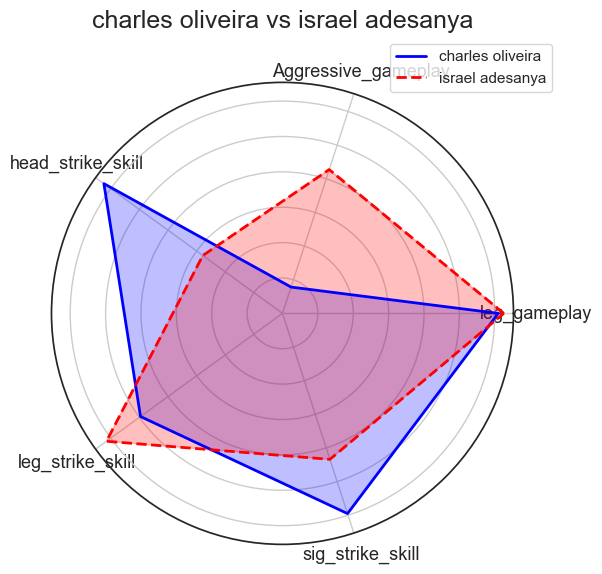

In [68]:
from modules.fighter_profile.fighter_skill_comparison import FighterSkillComparison
opponent1_data = normalized_df.iloc[30]  
opponent2_data = normalized_df.iloc[70]  
opponent1_data.name = 'charles oliveira' 
opponent2_data.name = 'israel adesanya'
FighterSkillComparison(opponent1_data, opponent2_data).fighter_skill_comparison(opponent1_data.name + ' vs ' + opponent2_data.name)

_From the above radar plot, skills of fighters charles oliveira and israel adesanya have been compared based on the new metric that we calculated and we can see that adesanya has a more aggresive gameplay than charles. Whereas, charles has much better strike accuracy._

d:\Studies_Data_Science\SEM_2\Data_management\Project\modules\fighter_profile\fighter_skill_comparison.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

d:\Studies_Data_Science\SEM_2\Data_management\Project\modules\fighter_profile\fighter_skill_comparison.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



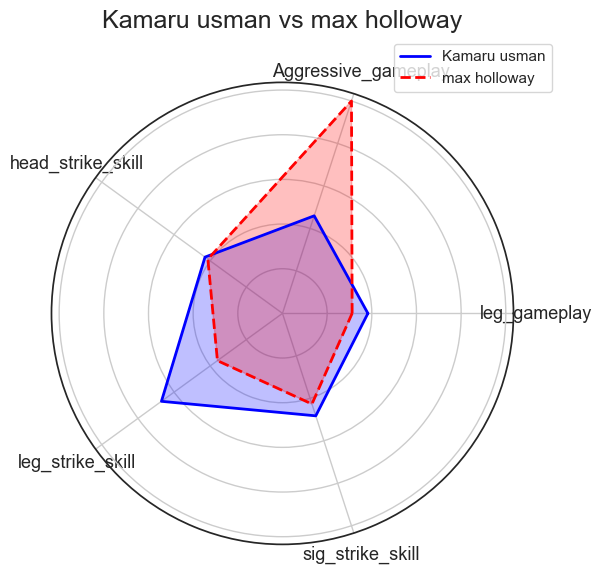

In [79]:
#Fighter Comparison-2
opponent1_data = normalized_df.iloc[90]  
opponent2_data = normalized_df.iloc[114]  
opponent1_data.name = 'Kamaru Usman' 
opponent2_data.name = 'Max Holloway'
FighterSkillComparison(opponent1_data, opponent2_data).fighter_skill_comparison(opponent1_data.name + ' vs ' + opponent2_data.name)

_From the above plot, we can say Max holloway has a more aggressive style gameplay and Kumaru Usman has better leg strike skill. They are similar in all other parameters_

#### Multilayer Pereceptron Regression to predict punches/kicks outcomes

In [69]:
df = pd.read_csv("data/filtered_dataset.csv")
df.head()

fight_url           fighter  \
0  http://ufcstats.com/fight-details/d5778494ce66...  sheldon westcott   
1  http://ufcstats.com/fight-details/b46b27222e62...  michinori tanaka   
2  http://ufcstats.com/fight-details/4fa02674b920...    dustin poirier   
3  http://ufcstats.com/fight-details/99a7172fb743...        drew dober   
4  http://ufcstats.com/fight-details/595557b808fe...      justine kish   

         opponent  result      age  height  head_strikes_landed  \
0    edgar garcia       1  11457.0    73.0                   33   
1        joe soto       1   9221.0    65.0                   46   
2       joe duffy       1   9844.0    69.0                   58   
3  scott holtzman       1   9936.0    68.0                   29   
4      nina nunes       1  10125.0    65.0                   45   

   body_strikes_landed  leg_strikes_landed  
0                    0                   0  
1                    6                   5  
2                    7                   7  
3                    4                   3  
4                   12                  15

_In the below code, we are pulling the attack data, grapling data and wrestling data that we created earlier and are structuring the dataset as required for our analysis._

In [70]:
from modules.fighter_profile.get_profile import Profile
new_df = Profile(filename='data/attack data.csv', df=df).merge_profile()
new_df = Profile(filename='data/grapling data.csv', df=new_df).merge_profile()
new_df = Profile(filename='data/wrestling data.csv', df=new_df).merge_profile()
label_encoder = LabelEncoder()
new_df['fighter_stance'] = label_encoder.fit_transform(new_df['fighter_stance'])
new_df['opponent_stance'] = label_encoder.fit_transform(new_df['opponent_stance'])
new_df.head()

fight_url           fighter  \
0  http://ufcstats.com/fight-details/d5778494ce66...  sheldon westcott   
1  http://ufcstats.com/fight-details/b46b27222e62...  michinori tanaka   
2  http://ufcstats.com/fight-details/4fa02674b920...    dustin poirier   
3  http://ufcstats.com/fight-details/99a7172fb743...        drew dober   
4  http://ufcstats.com/fight-details/595557b808fe...      justine kish   

         opponent  result      age  height  head_strikes_landed  \
0    edgar garcia       1  11457.0    73.0                   33   
1        joe soto       1   9221.0    65.0                   46   
2       joe duffy       1   9844.0    69.0                   58   
3  scott holtzman       1   9936.0    68.0                   29   
4      nina nunes       1  10125.0    65.0                   45   

   body_strikes_landed  leg_strikes_landed  fighter_stance  ...  \
0                    0                   0               1  ...   
1                    6                   5               0  ...   
2                    7                   7               1  ...   
3                    4                   3               1  ...   
4                   12                  15               0  ...   

   opponent_reversals  opponent_control  fighter_takedowns_landed  \
0                   0                 0                         1   
1                   0               448                         6   
2                   1               357                        16   
3                   3              2791                         8   
4                   1               706                         6   

   fighter_takedowns_attempts  fighter_ground_strikes_landed  \
0                           1                             33   
1                          18                             26   
2                          39                            110   
3                          31                             75   
4                          18                             17   

   fighter_ground_strikes_attempts  opponent_takedowns_landed  \
0                               73                          0   
1                               36                          4   
2                              166                          4   
3                              100                         20   
4                               28                          2   

   opponent_takedowns_attempts  opponent_ground_strikes_landed  \
0                            0                               0   
1                           14                              24   
2                            6                              11   
3                           34                             147   
4                            5                              29   

   opponent_ground_strikes_attempts  
0                                 0  
1                                25  
2                                16  
3                               206  
4                                40  

[5 rows x 49 columns]

_In the below code we train three MLP regressors for three of our dependant variables 'head_strikes_landed', 'body_strikes_landed' and 'leg_strikes_landed'. Also, the MSE ouptut for each model is shown in the output below._

In [71]:
regressor_dependant_variables = ['head_strikes_landed', 'body_strikes_landed', 'leg_strikes_landed']
columns_to_drop = ['fight_url', 'fighter', 'opponent', 'result', 'age', 'height']
columns_to_drop.extend(regressor_dependant_variables)
for variable in tqdm(regressor_dependant_variables):
    y = new_df[[variable]]
    X = new_df.drop(columns=columns_to_drop)
    mlp_regressor_model = MLP(X, y)
    print("Training for ", variable)
    mlp_regressor_model.train()
    train_mse, test_mse = mlp_regressor_model.get_performance_metrics()
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    

  0%|          | 0/3 [00:00<?, ?it/s]

Training for  head_strikes_landed


 33%|███▎      | 1/3 [00:23<00:46, 23.02s/it]

Train MSE: 14.239383358816298
Test MSE: 809.671511264153
Training for  body_strikes_landed


 67%|██████▋   | 2/3 [00:46<00:23, 23.18s/it]

Train MSE: 1.4708553402373217
Test MSE: 120.16022004384327
Training for  leg_strikes_landed


100%|██████████| 3/3 [01:01<00:00, 20.59s/it]

Train MSE: 3.657849755197088
Test MSE: 88.92169844183229


_Once the Fighter 1 and Fighter 2 details are entered in the input, the output is predicted and the predicted values tell the user as to what number of strikes are required for fighter 1 to win over fighter 2._ 

In [85]:
from modules.mlp.mlp import MLP
fighter_name = input("Enter fighter name: ")
opponent_name = input("Enter opponent name: ")
#fighter_name = "conor mcgregor" (Enter this name or any name in the present in the dataframe)
#opponent_name = "khabib nurmagomedov" (Enter this name any name in the present in the dataframe)
test_row = pd.DataFrame({'fighter': [fighter_name], 'opponent': [opponent_name]})
regressor_dependant_variables = ['head_strikes_landed', 'body_strikes_landed', 'leg_strikes_landed']
test_row = Profile(filename='data/attack data.csv', df=test_row).merge_profile()
test_row = Profile(filename='data/grapling data.csv', df=test_row).merge_profile()
test_row = Profile(filename='data/wrestling data.csv', df=test_row).merge_profile()
test_row = test_row.drop(columns=['fighter', 'opponent'])
test_row['fighter_stance'] = label_encoder.fit_transform(test_row['fighter_stance'])
test_row['opponent_stance'] = label_encoder.fit_transform(test_row['opponent_stance'])
predictions = MLP(test_row,test_row).predict(test_row, variables=regressor_dependant_variables)
predicted_head_strikes, predicted_body_strikes, predicted_leg_strikes = round(predictions[0][0]), round(predictions[1][0]), round(predictions[2][0])
print(f'In order for fighter 1 to win against this particular opponent, approximately {predicted_head_strikes} head strikes, {predicted_body_strikes} body strikes, and {predicted_leg_strikes} leg strikes are needed.')

In order for fighter 1 to win against this particular opponent, approximately 37 head strikes, 13 body strikes, and 10 leg strikes are needed.


Note: I believe there is overfitting in the training model, given more time I hope to fix it in the future :)

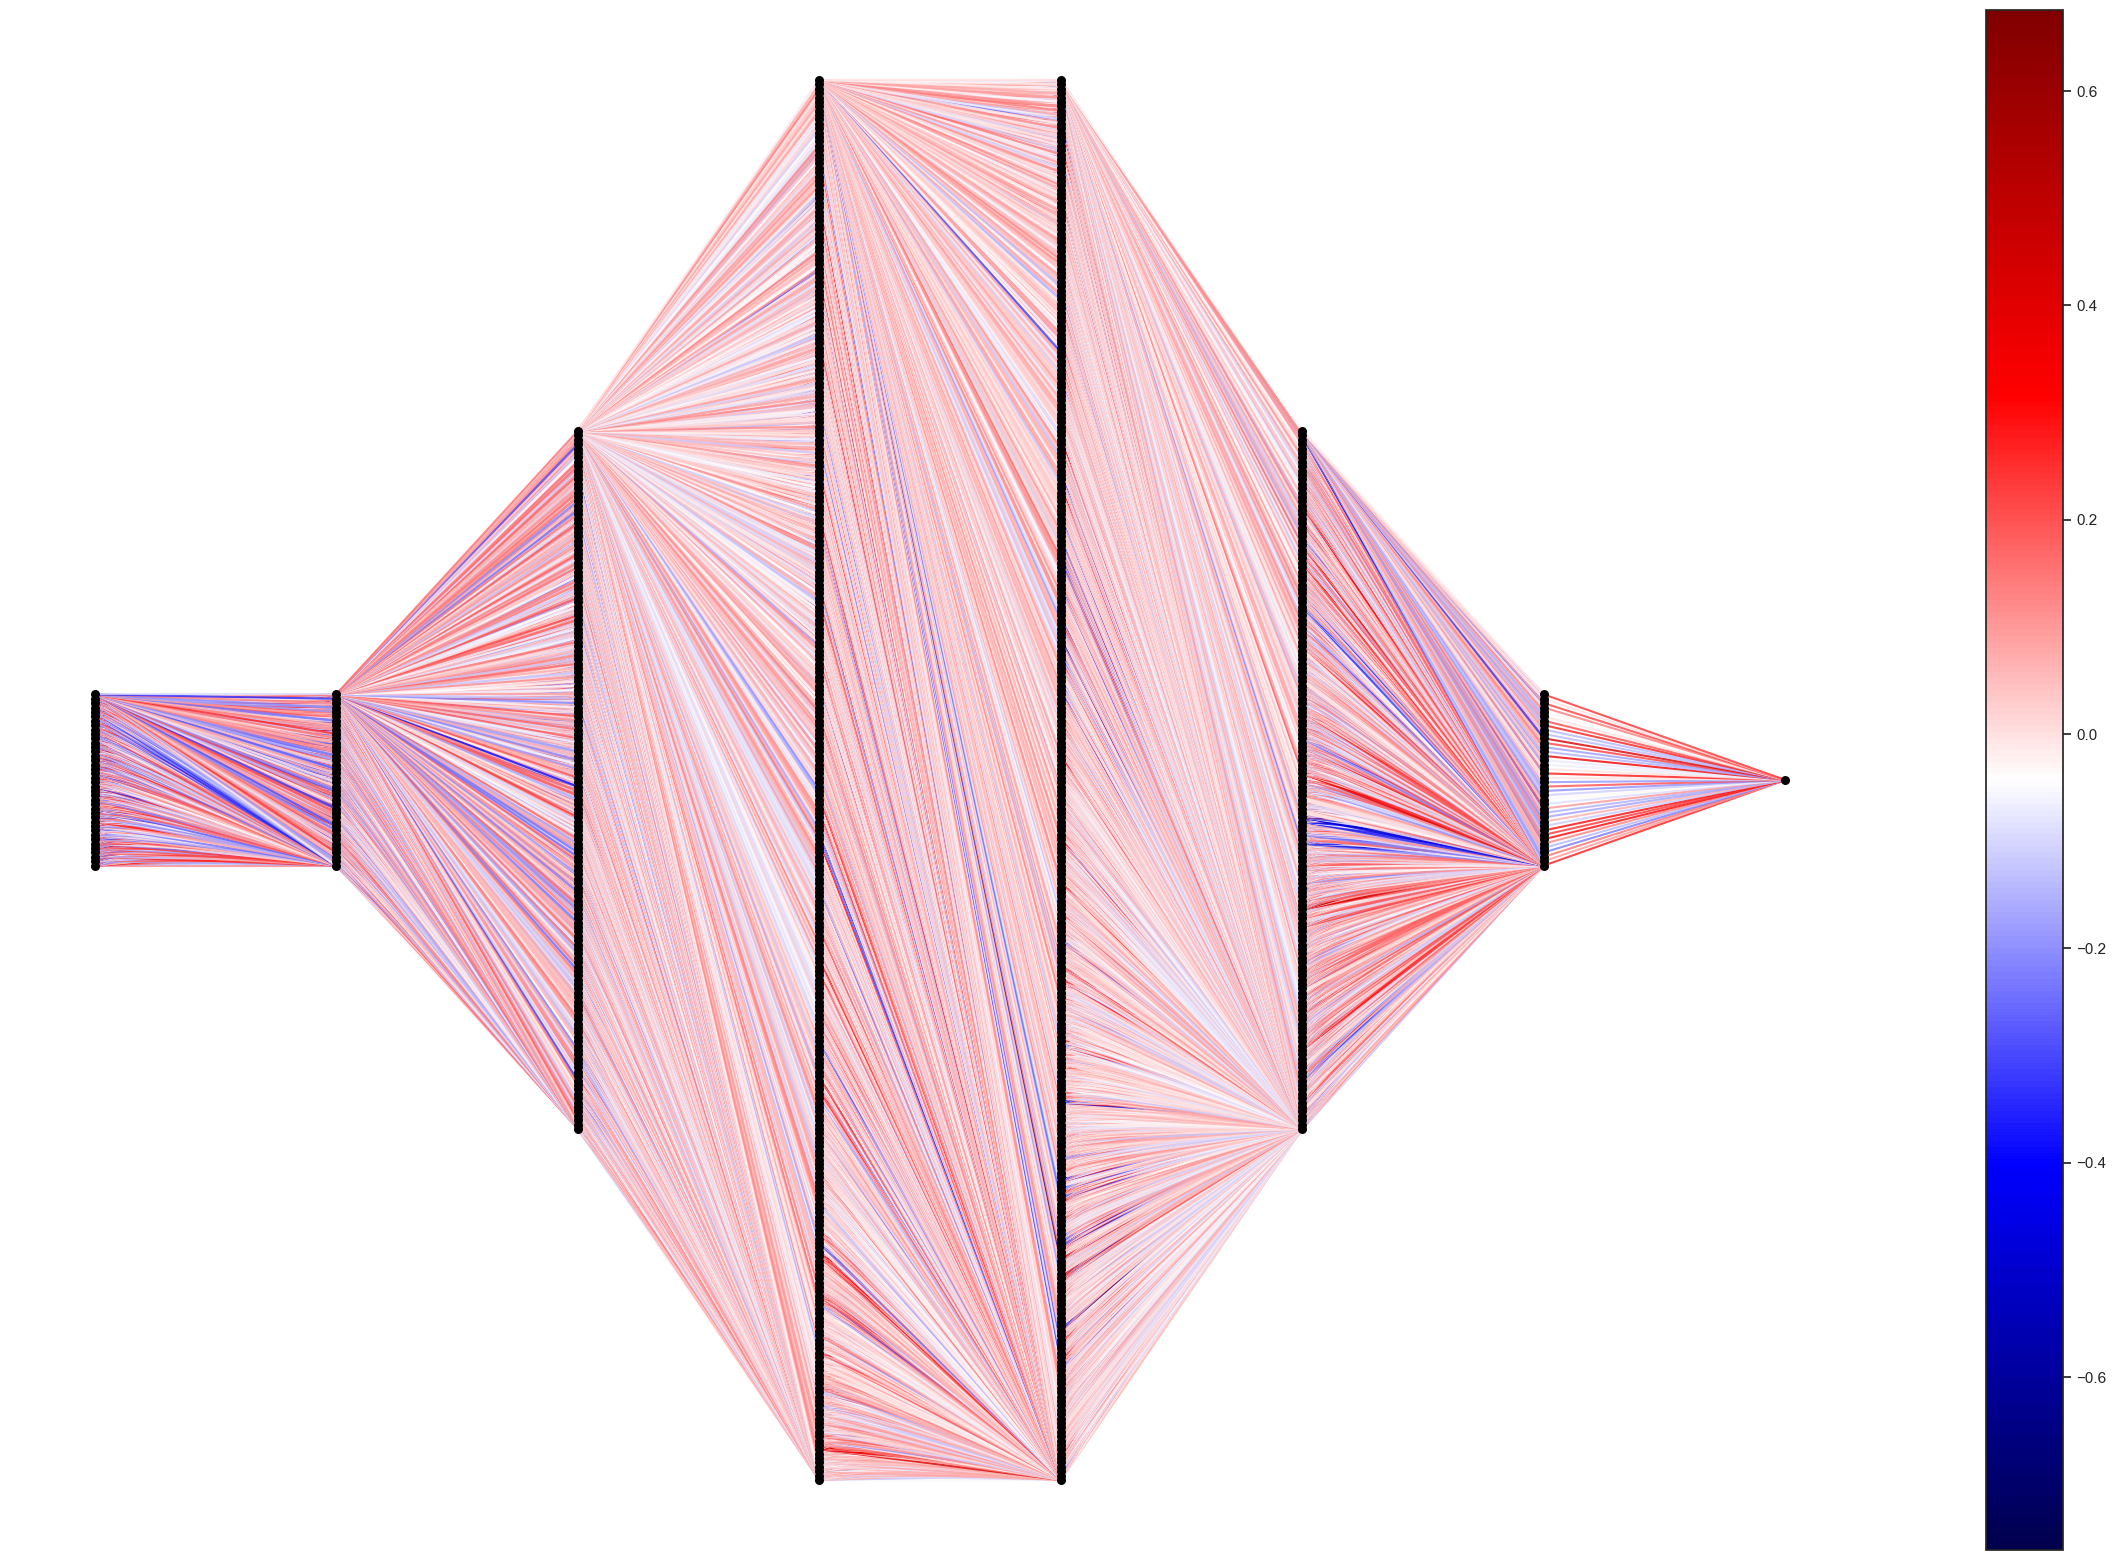

In [80]:
with open('models/mlp_regressor_model_head_strikes_landed.pkl', 'rb') as file:
    prediction_model = pickle.load(file)
from modules.plots.mlp_visualization import  display_mlp

_ = display_mlp(
    prediction_model,
    linewidth=1.5,
    neuron_alpha=1,
    neuron_color="black",
    line_alpha=0.8,
    figure_width=30,
    figure_height=20,
    neuron_size=30,
    colormap_name="seismic",
)